In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# standard imports
import os

# external imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cv2

# import datasets, models, algorithms, etc.
from skimage.feature import hog
from sklearn.svm import SVC

In [4]:
# load image from filename
def load_image(filename, resize_target = (64, 64)):
    img_path_ = os.path.join(os.getcwd(), "data", filename)

    if not os.path.exists(img_path_):
        print(f"path '{img_path_}' does not exist.")
        return

    if not filename.endswith((".jpg", ".jpeg", ".png")):
        print(f"'{filename}' is not an image.")
        return

    # read image from filename
    image_ = cv2.imread(img_path_)
    if image_ is None:
        print(f"Failed to load image '{img_path_}'.")
        return None

    # scale image to specified target size
    resized_image_ = cv2.resize(image_, resize_target)

    # convert from BGR (cv2 default) to gray-scale (since HOG generally works better with gray-scale)
    gray_image_ = cv2.cvtColor(resized_image_, cv2.COLOR_BGR2GRAY)

    return gray_image_

In [5]:
# load the dog and cat images
img_dog = load_image("dog.jpg")
img_cat = load_image("cat.jpg")

In [6]:
# compute HOG features from the images

features_dog, hog_img_dog = hog(
    img_dog, 
    orientations = 9, 
    pixels_per_cell = (8, 8), 
    cells_per_block = (2, 2), 
    visualize = True
)

features_cat, hog_img_cat = hog(
    img_cat, 
    orientations = 9, 
    pixels_per_cell = (8, 8), 
    cells_per_block = (2, 2), 
    visualize = True
)

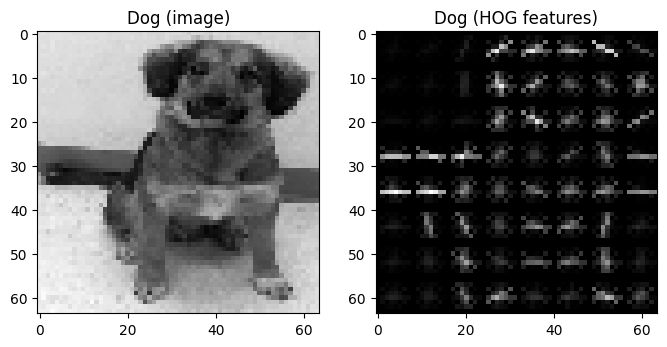

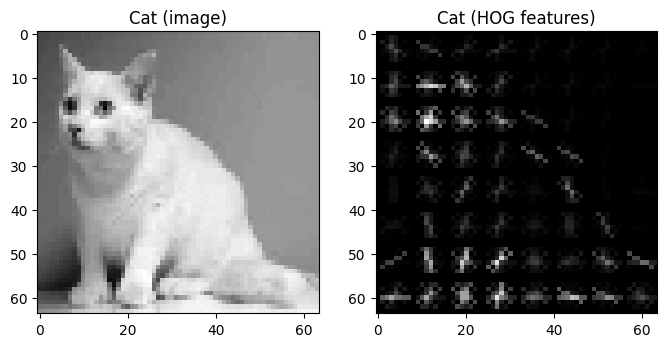

In [7]:
# plot the original images and their HOG visualizations

def plot_image_with_hog(title, image, hog_image):
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))
    
    plt.subplot(1, 2, 1)
    plt.title(f"{title} (image)")
    plt.imshow(image, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title(f"{title} (HOG features)")
    plt.imshow(hog_image, cmap='gray')

    plt.show()

# dog
plot_image_with_hog("Dog", img_dog, hog_img_dog)

# cat
plot_image_with_hog("Cat", img_cat, hog_img_cat)

In [14]:
# prepare the features and label

# for cat
X_train_cat = np.array([features_cat, features_dog])
y_train_cat = np.array([1, 0])

In [15]:
# train using classifier of SVM
model = SVC(kernel="linear")

In [16]:
# train the model with the image of the cat
model.fit(X_train_cat, y_train_cat)

SVC(kernel='linear')

In [20]:
# test prediction on real image
prediction = model.predict([features_dog])

In [21]:
if prediction == 1:
    print("The image is predicted as a Cat.")
else:
    print("The image is predicted as a Dog.")

The image is predicted as a Dog.
